In [ ]:
!git clone https://github.com/DatumLearning/SSD_using_OpenCV.git

Cloning into 'SSD_using_OpenCV'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (15/15), 21.19 MiB | 25.98 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
classNames = { 0: 'background',
1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat',
5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 9: 'chair',
10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse',
14: 'motorbike', 15: 'person', 16: 'pottedplant',
17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor' }

In [ ]:
proto = "/content/SSD_using_OpenCV/MobileNetSSD_deploy.prototxt"
weights = "/content/SSD_using_OpenCV/MobileNetSSD_deploy.caffemodel"
net = cv2.dnn.readNetFromCaffe(proto , weights)

In [ ]:
img =cv2.imread("/content/SSD_using_OpenCV/doggo.jpg")
img_resized = cv2.resize(img , (300 , 300))

In [ ]:
blob = cv2.dnn.blobFromImage(img_resized , 0.007483 , (300 ,300) ,(127.5 , 127.5 ,127.5))

In [ ]:
net.setInput(blob)

In [ ]:
detections = net.forward()

In [ ]:
final = detections.squeeze()

In [ ]:
height , width , _ = img.shape

In [ ]:
final.shape[0]

100

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [ ]:
ig = cv2.imread("/content/SSD_using_OpenCV/doggo.jpg")
for i in range(final.shape[0]):
  conf = final[i , 2]
  if conf > 0.5:
    class_name = classNames[final[i , 1]]
    print(class_name)
    x1n , y1n , x2n , y2n = final[i ,3:]
    print(x1n , y1n , x2n , y2n)
    x1 = int(x1n * width)
    y1 = int(y1n * height)
    x2 = int(x2n * width)
    y2 = int(y2n * height)
    top_left = (x1 , y1)
    bottom_right = (x2 , y2)
    ig = cv2.rectangle(ig , top_left , bottom_right ,(0 , 255 , 0) , 3)
    ig = cv2.putText(ig , class_name , (x1 , y1-10) , font , 0.5 ,
                     (255 , 0 , 0) , 1 , cv2.LINE_AA)

dog
0.18088078 0.3642932 0.42245072 0.9392456
car
0.6084709 0.12525234 0.8951913 0.29728368
bicycle
0.13522995 0.24564569 0.7469894 0.7192954


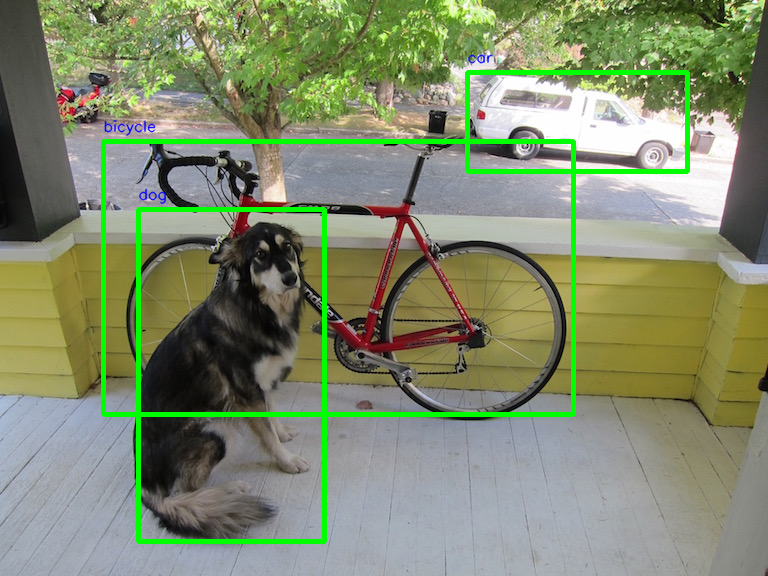

In [ ]:
cv2_imshow(ig)

In [ ]:
final

array([[ 0.        , 12.        ,  0.99834454,  0.18088078,  0.3642932 ,
         0.42245072,  0.9392456 ],
       [ 0.        ,  7.        ,  0.9964154 ,  0.6084709 ,  0.12525234,
         0.8951913 ,  0.29728368],
       [ 0.        ,  2.        ,  0.99459994,  0.13522995,  0.24564569,
         0.7469894 ,  0.7192954 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.    